<a href="https://colab.research.google.com/github/namrataawagh/MachineLearning/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid'] # rename

In [ ]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<ipython-input-31-30cfb61bc690>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

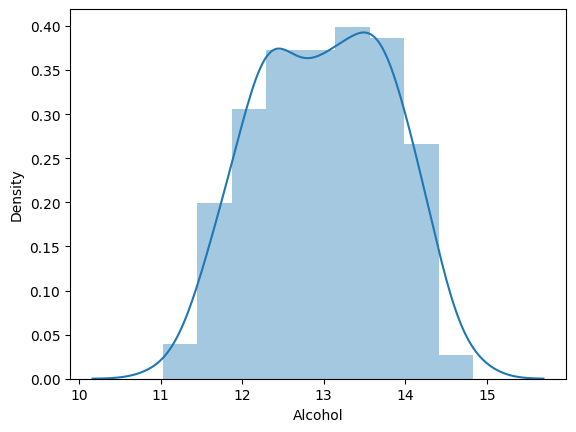

In [ ]:
sns.distplot(df['Alcohol'])

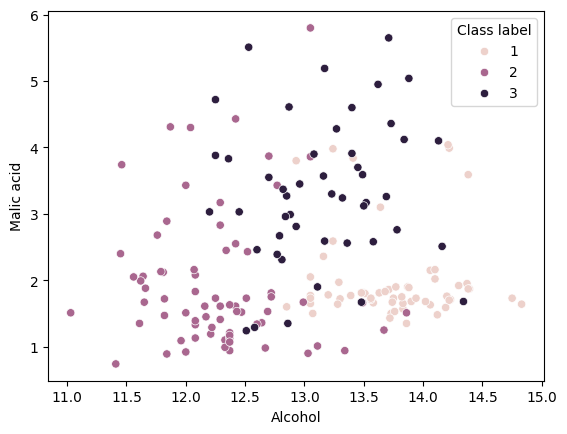

In [ ]:
sns.scatterplot(x ='Alcohol',y = 'Malic acid',data = df ,hue='Class label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),df['Class label'], test_size =0.3,random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to train set, it will learn the parameters
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [ ]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


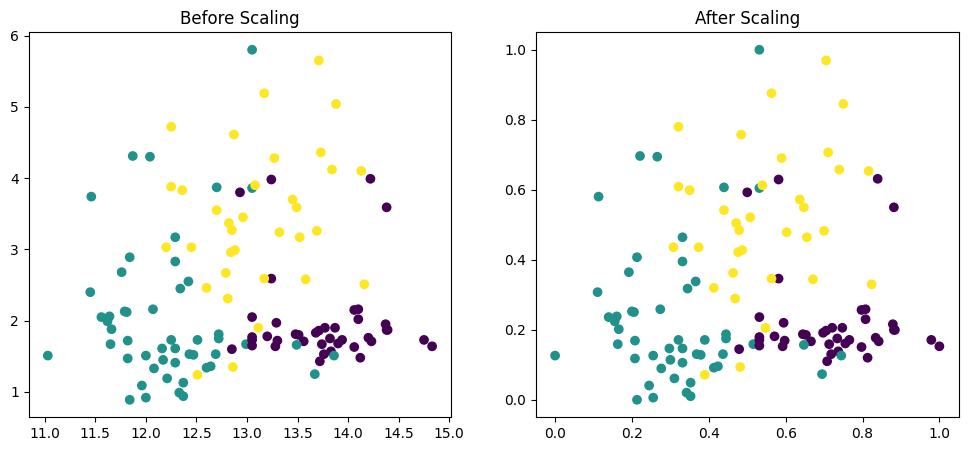

In [ ]:
fig ,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

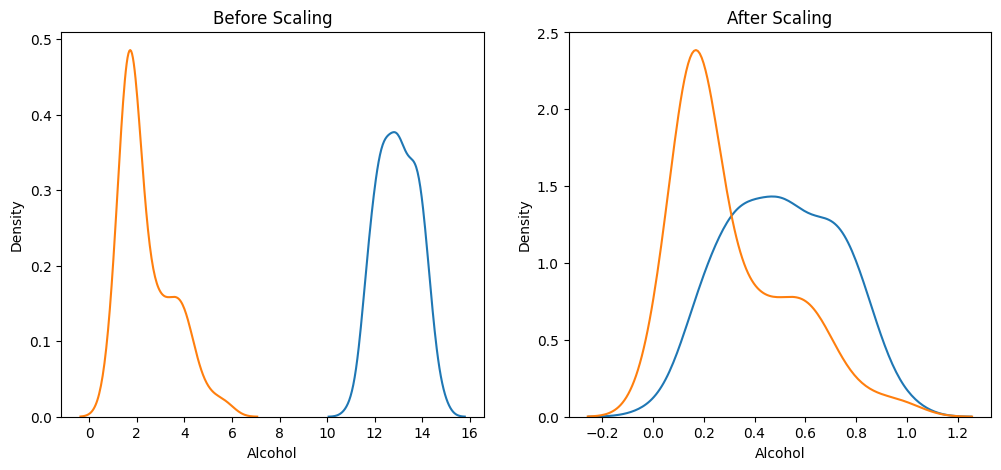

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize =(12,5))

# before scaling

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

# after scaling

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()